In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Q1Data.csv')
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


# Decision Tree from scratch


In [3]:
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right

def gini_index(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

def split_dataset(X, y, feature, threshold):
    left_mask = X[:, feature] <= threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

def information_gain(y, left_y, right_y):
    p = len(left_y) / len(y)
    return gini_index(y) - p * gini_index(left_y) - (1 - p) * gini_index(right_y)

def build_tree(X, y, depth=1, max_depth=15):
    if depth == max_depth or len(np.unique(y)) == 1:
        return Node(value=np.argmax(np.bincount(y)))

    best_feature = None
    best_threshold = None
    best_info_gain = 0

    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_X, left_y, right_X, right_y = split_dataset(X, y, feature, threshold)
            current_info_gain = information_gain(y, left_y, right_y)

            if current_info_gain > best_info_gain:
                best_info_gain = current_info_gain
                best_feature = feature
                best_threshold = threshold

    if best_info_gain == 0:
        return Node(value=np.argmax(np.bincount(y)))

    left_X, left_y, right_X, right_y = split_dataset(X, y, best_feature, best_threshold)
    left_node = build_tree(left_X, left_y, depth + 1, max_depth)
    right_node = build_tree(right_X, right_y, depth + 1, max_depth)

    return Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node)

def predict(tree, X):
    if tree.value is not None:
        return tree.value

    if X[tree.feature] <= tree.threshold:
        return predict(tree.left, X)
    else:
        return predict(tree.right, X)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def train_test_split(X, y, test_size=0.8, random_state=None):
    if random_state:
        np.random.seed(random_state)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split_idx = int((1 - test_size) * len(X))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    return X_train, X_test, y_train, y_test

X = df.iloc[:, :6].values
y = df['Genus'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.8, random_state=42)

tree = build_tree(X_train, y_train, max_depth=15)

y_pred = np.array([predict(tree, x) for x in X_test])


In [4]:
depths = list(range(1, 16))
accuracies_DTS = []

for depth in depths:
    tree = build_tree(X_train, y_train, max_depth=depth)
    y_pred = np.array([predict(tree, x) for x in X_test])
    acc = accuracy(y_test, y_pred)
    accuracies_DTS.append(acc)
    print(f"Depth: {depth}, Accuracy: {acc}")




Depth: 1, Accuracy: 0.5749522320653118
Depth: 2, Accuracy: 0.6828209136703144
Depth: 3, Accuracy: 0.7710613166579816
Depth: 4, Accuracy: 0.8136182039256558
Depth: 5, Accuracy: 0.8315094667361473
Depth: 6, Accuracy: 0.8412367552544728
Depth: 7, Accuracy: 0.8568698975160673
Depth: 8, Accuracy: 0.8678130970991836
Depth: 9, Accuracy: 0.8749348619072433
Depth: 10, Accuracy: 0.8759770713913496
Depth: 11, Accuracy: 0.8747611603265589
Depth: 12, Accuracy: 0.8740663540038215
Depth: 13, Accuracy: 0.8754559666492965
Depth: 14, Accuracy: 0.8754559666492965
Depth: 15, Accuracy: 0.8754559666492965


Best Accuracy for Decison Tree from scratch is 87.5%

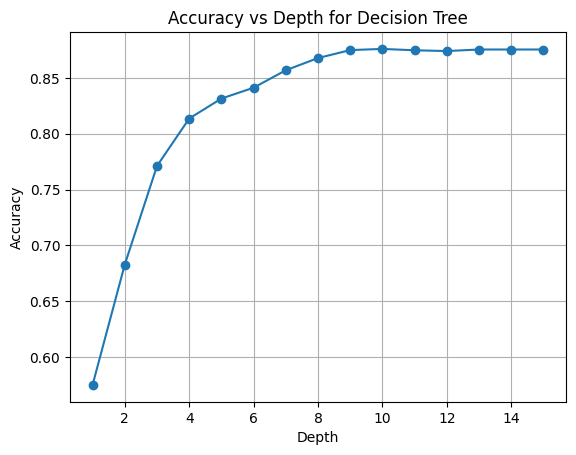

In [5]:
plt.plot(depths, accuracies_DTS, marker='o')
plt.title('Accuracy vs Depth for Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

* As the depth of the tree increases from 1 to around 10, the accuracy of the model on the test set also increases. This suggests that allowing the tree to grow deeper enables it to capture more nuances in the data, thus improving its predictive performance.
*  Beyond a certain depth (around 10 in this case), the increase in accuracy tapers off.
* Since the test accuracy plateaus, it suggests that the model starts to overfit to the training data beyond a certain depth.

# Decision Tree using sklearn


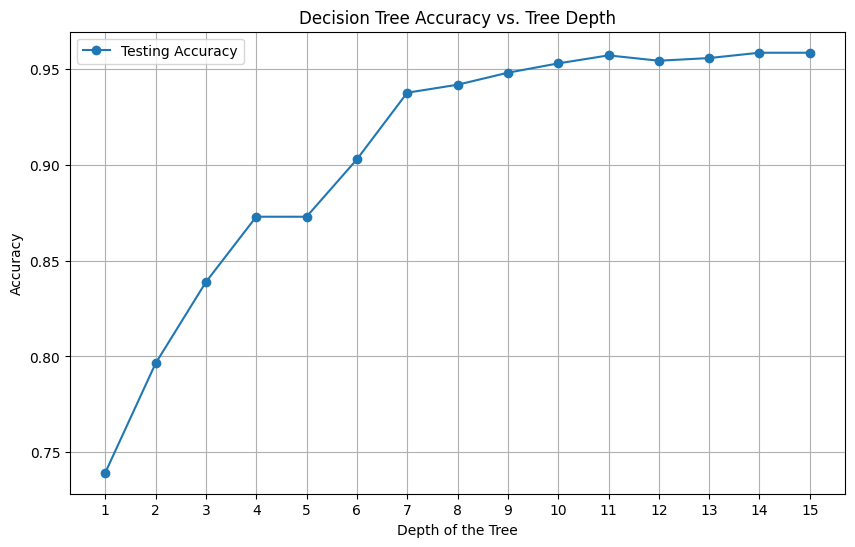

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data_path = 'Q1Data.csv'
data = pd.read_csv(data_path)

encoder = LabelEncoder()
data['Genus'] = encoder.fit_transform(data['Genus'])

X = data.drop(['Family', 'Genus', 'Species'], axis=1)
y = data['Genus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = range(1, 16)
test_accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    test_acc = accuracy_score(y_test, clf.predict(X_test))

    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs. Tree Depth')
plt.xlabel('Depth of the Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(depths)
plt.grid(True)
plt.show()


In [7]:
test_accuracies

[0.7394023627519111,
 0.7963863794301599,
 0.8387769284225156,
 0.8728283530229326,
 0.8728283530229326,
 0.9027102154273802,
 0.9374565670604587,
 0.9416261292564281,
 0.9478804725503822,
 0.9527449617790132,
 0.9569145239749827,
 0.9541348158443363,
 0.9555246699096595,
 0.9583043780403058,
 0.9583043780403058]

Best accuracy for decision tree with sklearn is 95.38%


# KNN
## Without sklearn

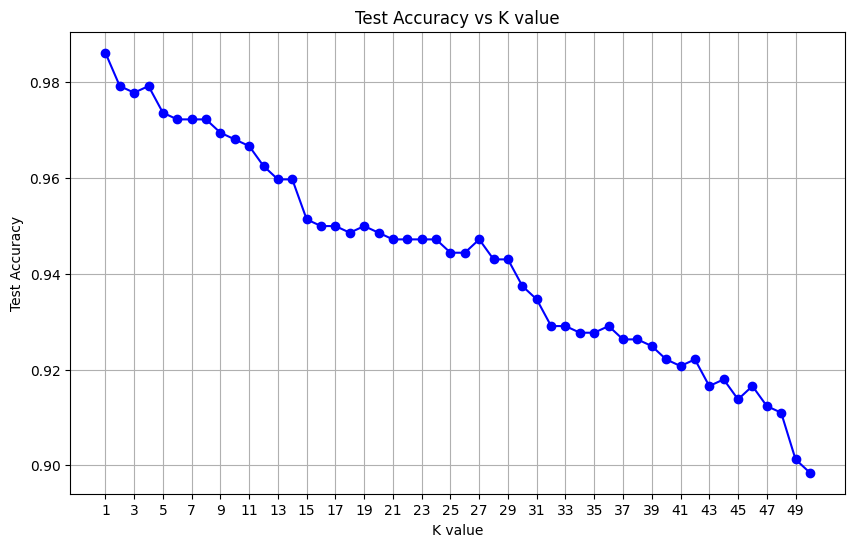

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(X_train, test_point):
    return np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))

def knn_predict(X_train, y_train, test_point, k):
    distances = euclidean_distance(X_train, test_point)
    k_nearest_neighbors_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_nearest_neighbors_indices]

    unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
    most_common_label = unique_labels[np.argmax(counts)]

    return most_common_label

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

data = pd.read_csv('Q1Data.csv')
X = data.iloc[:, :21].values
y = data['Genus'].values

np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(len(X) * 0.3)
test_size = int(len(X) * 0.1)

X_train = X[indices[:train_size]]
y_train = y[indices[:train_size]]
X_test = X[indices[train_size:train_size + test_size]]
y_test = y[indices[train_size:train_size + test_size]]

k_values = range(1, 51)
accuracies = []

for k in k_values:
    y_pred_vectorized = [knn_predict(X_train, y_train, x, k) for x in X_test]
    accuracies.append(accuracy(y_test, y_pred_vectorized))


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Test Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(1, 51, 2))
plt.grid(True)
plt.show()




The accuracy seems to be the highest at k=4, and it remains relatively stable up to around k=7. After this point, the accuracy begins to decline.

# KNN using sklearn

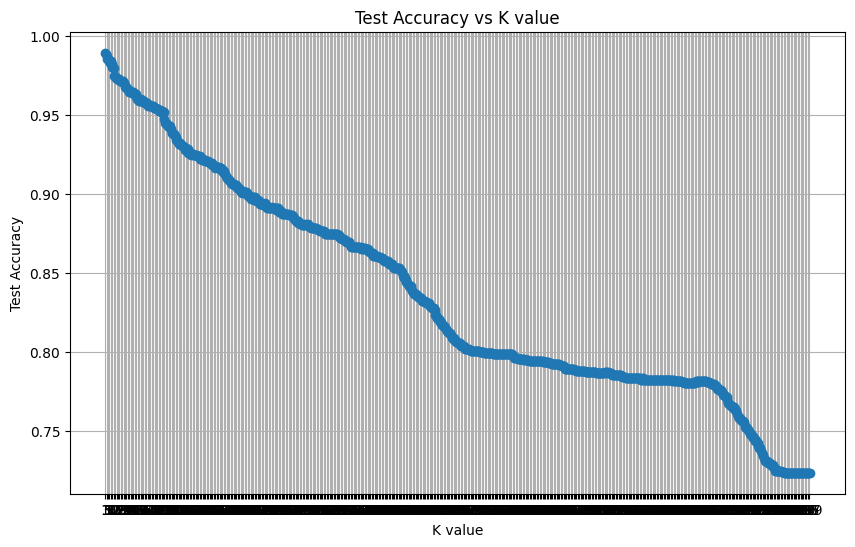

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Q1Data.csv')

X = data.iloc[:, :21]
y = data['Genus']      #

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values_sk = range(1, 1001)
accuracies_sk = []

for k in k_values_sk:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies_sk.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values_sk, accuracies_sk, marker='o')
plt.title('Test Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(1, 1001, 2))
plt.grid(True)
plt.show()


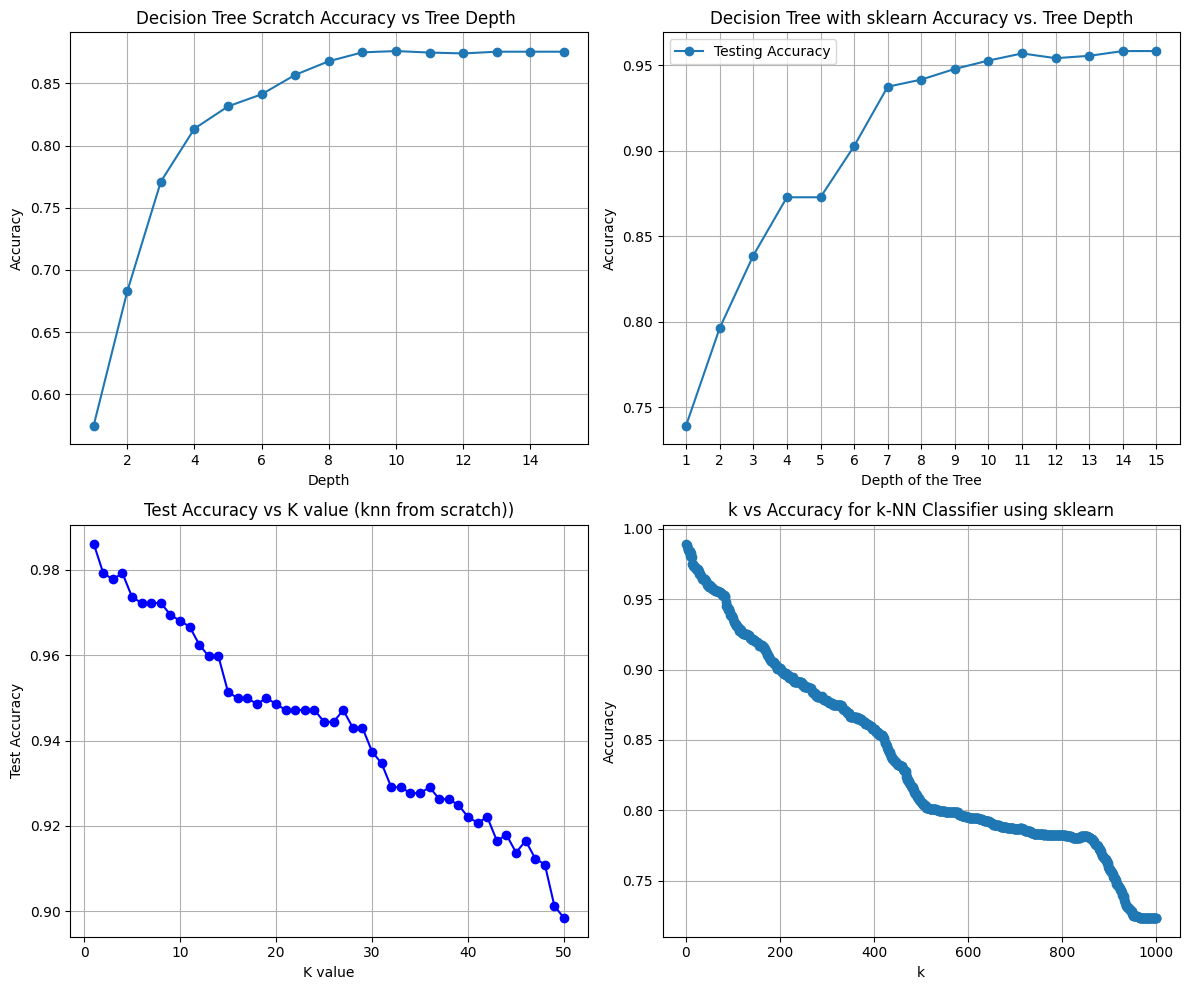

In [12]:
plt.figure(figsize=(12, 10))

# Plot 1, DT made with scratch
plt.subplot(2, 2, 1)
plt.plot(depths, accuracies_DTS, marker='o')
plt.title('Decision Tree Scratch Accuracy vs Tree Depth ')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot 2, DT with sklearn
plt.subplot(2, 2, 2)
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree with sklearn Accuracy vs. Tree Depth')
plt.xlabel('Depth of the Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(depths)
plt.grid(True)

# Plot 3, KNN from scratch
plt.subplot(2, 2, 3)
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Test Accuracy vs K value (knn from scratch))')
plt.xlabel('K value')
plt.ylabel('Test Accuracy')
# plt.xticks(np.arange(1, 51, 2))
plt.grid(True)

# Plot 4, knn using sklearn
plt.subplot(2, 2, 4)
plt.plot(k_values_sk, accuracies_sk, marker='o')
plt.title('k vs Accuracy for k-NN Classifier using sklearn')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()

plt.show()

We can see that Decision Tree using sklearn gives higher accuracy than the one made with scratch.
Similarly for knn, its much faster to compute the value of k for which the accuracy is the highest. that is at k=3 or k= 4.